In [1]:
# use this function to generate your stick_data array
import numpy as np
import matplotlib.pyplot as plt
 
def stick_data(n=100, std=0.1, mean=5.1):
  return np.random.normal(mean, std, size=n);

n = 1000
x = stick_data(n);


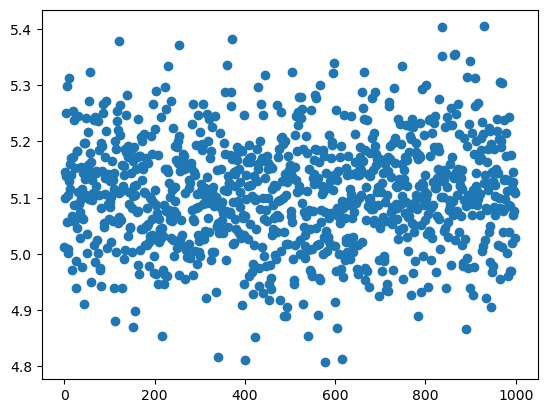

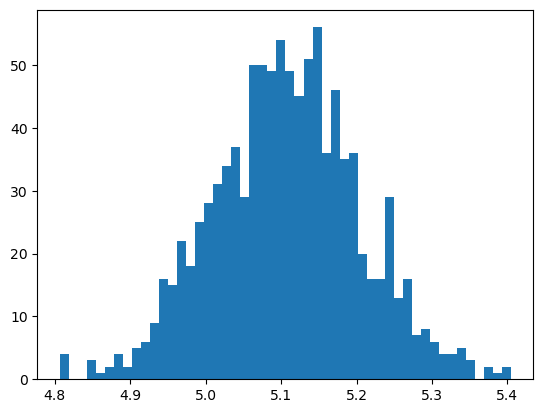

In [3]:
plt.figure()
labels = np.arange(n)
plt.plot(labels, x, 'o')

plt.figure()
h = plt.hist(x, bins=50)


# **Flow control and intro to data visualization**





Topics covered:

- loading data from files
- using data to infer information
- for loops
- if/else statements
- exercises and recap of arrays, functions, flow control




##**1. Loading/saving a text file and visualizing data**

The simplest `numpy`-based way of reading text-format data from files is using `loadtxt` function in `numpy`. The inverse would be to write an `ndarray` to a text file using `savetxt`.

Because we are working with Colab, we are not automatically able to read files from someone's google drive, or read them from your local machine. The latter would be possible if you were running these functions in an ipython notebook on your computer. Instead, for this class, we will grab the file from a website using the following set of commands. Please don't worry about reproducing these commands for the purposes of this class---this is a one-time thing you need to do to access this data in this Colab session.

In [ ]:
%%sh
mkdir -p chung_data && cd chung_data
wget https://raw.githubusercontent.com/veragluscevic/phys190-fall2023-public/main/data/data_0uM.txt
wget https://raw.githubusercontent.com/veragluscevic/phys190-fall2023-public/main/data/data_3uM.txt
wget https://raw.githubusercontent.com/veragluscevic/phys190-fall2023-public/main/data/data_200uM.txt
cd ..

--2023-09-19 16:16:49--  https://raw.githubusercontent.com/veragluscevic/phys190-fall2023-public/main/data/data_0uM.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6059 (5.9K) [text/plain]
Saving to: ‘data_0uM.txt’

     0K .....                                                 100% 26.4M=0s

2023-09-19 16:16:49 (26.4 MB/s) - ‘data_0uM.txt’ saved [6059/6059]

--2023-09-19 16:16:49--  https://raw.githubusercontent.com/veragluscevic/phys190-fall2023-public/main/data/data_3uM.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 605

##**Exercise**: Load and visualize data.

From `chung_data` location on the cloud server that runs this Colab, load the following three data files: `data_0uM.txt`, `data_3uM.txt`, and `data_200uM.txt`, using `np.loadtxt`. The labels on the data files denote the amount of lipid in a protein solution.

Once you read in the data, figure out the shape of the array that each file contains.

Next, plot the three arrays. Note that the first column of each data array is your x-axis (this is the wavelength of light emitted by the solution, in nano meters) and the second column is your y-axis (this is the intensity of light emitted by the solution). Label the axes of the plot correctly.

Find the x-axis location of the maximum of each curve. Describe how the wavelength at which the intensity peaks changes as the amount of lipid changes in the solution.

If you worked in Prof. Chung's lab, how would you use this measurement to tell how much lipid is bound to protein?

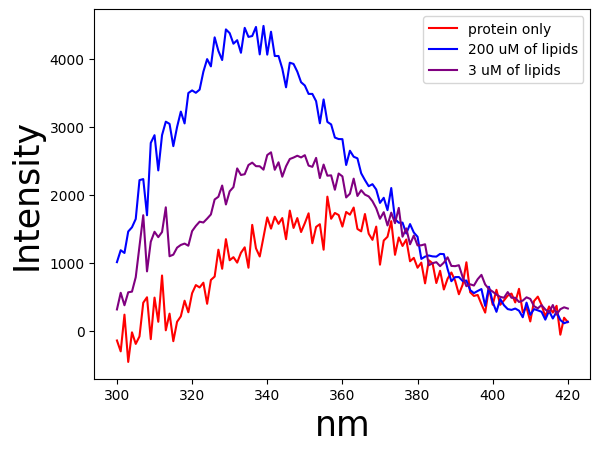

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cols = ['red', 'blue', 'purple', 'magenta']

d_0 = np.loadtxt('chung_data/data_0uM.txt')
d_3 = np.loadtxt('chung_data/data_3uM.txt')
d_200 = np.loadtxt('chung_data/data_200uM.txt')

fig, ax = plt.subplots()

ax.plot(d_0[:,0], d_0[:,1],  color=cols[0], label='protein only')
ax.plot(d_200[:,0], d_200[:,1],  color=cols[1], label='200 uM of lipids')
ax.plot(d_3[:,0], d_3[:,1],  color=cols[2], label='3 uM of lipids')

ax.set_xlabel('nm', fontsize=25)
ax.set_ylabel('Intensity', fontsize=25)

ax.legend()



In [ ]:
print(d_0[:,1].max(),d_200[:,1].max(),d_3[:,1].max())

1970.68136 4482.014213333334 2622.7337473333337


In [ ]:
print(d_0[:,0][np.argmax(d_0[:,1])],d_200[:,0][np.argmax(d_200[:,1])],d_3[:,0][np.argmax(d_3[:,1])])

356.0 339.0 341.0


##**1. loops**

In [ ]:
# basic for loop:
for i in [1,2,3,4]:
  print(i)
print('done')

1
2
3
4
done


In [ ]:
# for loop with an iterable object, enumerate
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']#List is an iterable object

for i,planet in enumerate(planets):
  print(f'{planet} is #{i+1} from the Sun.')

Mercury is #1 from the Sun.
Venus is #2 from the Sun.
Earth is #3 from the Sun.
Mars is #4 from the Sun.
Jupiter is #5 from the Sun.
Saturn is #6 from the Sun.
Uranus is #7 from the Sun.
Neptune is #8 from the Sun.


In [ ]:
# basic while-loop

import numpy as np
xs = np.arange(10) + 200.
print(xs)

#need to set initial values:
i = 0

while i < 5:
    print('iteration number ' + str(i))
    i = i+1


[200. 201. 202. 203. 204. 205. 206. 207. 208. 209.]
iteration number 0
iteration number 1
iteration number 2
iteration number 3
iteration number 4


##**2. if/else**

In [ ]:
#basic if-else statement:

special_number = 3
for i in [1,2,3,4]:
  if i==special_number:
    print('found it!')
  else:
    print('not it.')
print('done')

not it.
not it.
found it!
not it.
done


###**continue, break [optional]**

In [ ]:
solar_system = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto']


print('The planets are:\n')
for i,ss in enumerate(solar_system):
  if ss=='Sun' or ss=='Pluto':
    continue
  else:
    print(i,ss)


The planets are:

1 Mercury
2 Venus
3 Earth
4 Mars
5 Jupiter
6 Saturn
7 Uranus
8 Neptune


In [ ]:
#use of continue:

xs = np.arange(10) + 200.
print(xs)

for i,x in enumerate(xs):
  if x > 205:
    break
  else:
    print(f'xs[{i}]={x}')

[200. 201. 202. 203. 204. 205. 206. 207. 208. 209.]
xs[0]=200.0
xs[1]=201.0
xs[2]=202.0
xs[3]=203.0
xs[4]=204.0
xs[5]=205.0


###**Exercise**: random even integers.

Write a for-loop that creates 10 random integer numbers between 0 and 300, and only prints the even ones.

You will want to call the function `randint` from module `random` in order to create a random integer, and then check its parity.

In [ ]:
from random import *
my_list = []

num = 10

for i in range(num):
  number = randint(0, 300)
  if number % 2 == 0:
    my_list.append(number)

print(my_list)

[298, 268, 40, 232, 274, 294]


##**4. Exercises**


###**Exercise**: Energy band calculator

However, an electron that is bound within an atom, or within a crystal, can only have certain precise energy levels; energies between these levels are impossible. Energy levels are thus "quantized." You will learn much more about this in quantum mechanics.

When a large number of allowed levels have close-spaced energy values, i.e. have energies that differ only minutely, those close energy levels in combination are called an "energy band". When atoms live in a crystalline lattice, in systems we study within "condensed matter physics," under certain conditions, their electrons can flow between atoms easily. Such materials are conductors of electrical current, which you will learn about more later on. For right now, we'll take the following model for what energy looks like for atoms that live in a crystallyne structure:

$ E = 2t (1- \cos(k a))$,

and this time, we will use k as a proxy for the electron momentum (a measure of how far it is able to travel); k is now in units of inverse length. Parameters a and t are "free" parameters of this function, in the following sense: a physicist (you) should be able to choose values of a and t, depending on what material they are working with; for each solid sate material you are working with, these parameters have specific values.

Part I:

Your task is to write a function that returns the energy of an electron in a band, described by the above equation. You again need to decide on positional and keyword arguments. Here are some reasonable values of a and t:

a = 2 angstrom

t = 1 electron volt


Check your result against the same function of the neighbouring group.

Part II:

If you've completed previous tasks, go ahead and test whether your function can work when k is numpy array. If not, re-write it such that it works, regardless of the shape of k.

Part III:

Explore matplotlib gallery and figure out how to create a 2-dimensional plot of the energy band, assuming kx=ky.

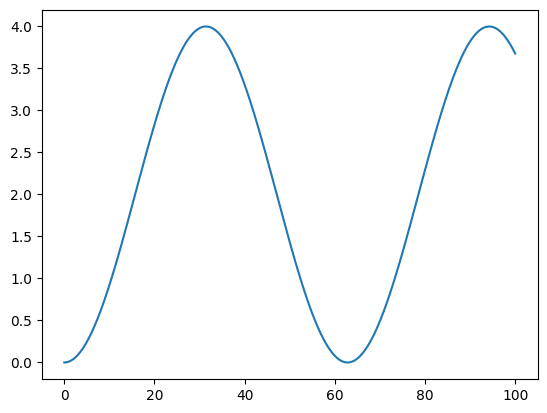

In [ ]:
def energy1d(k, t=1., a=3.):
  """
  k is momentum in 1/angstrom
  a is typical node separation in angstroms
  t is typical energy scale in solid state
  """
  en = 2. * t * (1. - np.cos(k * a))
  return en

# use test:
energy1d(0.1, t=1., a=3.)

ks = np.linspace(0, 100, 1000)
energies = energy1d(ks, a=0.1)

import matplotlib.pyplot as plt
plt.plot(ks,energies)


In [ ]:
nks = 100
ks = np.linspace(0, 100, nks)
en = np.zeros((nks,nks))
t = 1.
a = 0.2
x, y = np.meshgrid(ks, ks)
for i,kx in enumerate(ks):
  for j,ky in enumerate(ks):
    en[i,j] = 2. * t * (np.cos(kx*a) + np.cos(ky*a))

#illustrate meshgrid:
ksm = np.linspace(0, 100, 2)
xm, ym = np.meshgrid(ksm, ksm)
print(ym[:,1])
print(xm[1,:])

[  0. 100.]
[  0. 100.]


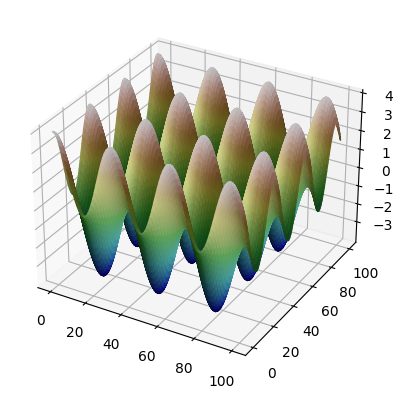

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(en, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, en, rstride=1, cstride=1, facecolors=rgb)

plt.show()
plt.savefig('band.png')

###**Exercise**: Energy bands (non-trivial topology)

Write a function that defines one topologically non-trivial case discussed in lecture by Dr. Haas, where the energy is given by

$$E=t_1^2+ t_2^2+ t_1t_2cos(ka)$$

and $k$ is the momentum of an electron. Remember that  $a$ , $t_1$ , and $t_2$ are parameters of the crystalline lattice. They can be set by the user of the function. Test your function and show your test.


Load `matplotlib.pyplot` and plot the output of this function (plot $E$ versus $k$). Notice that you need to plot both positive and negative solutions of the function above!

Plot $E(k)$ again, for at least 2 different choices of the set of values for ( $a$ , $t_1$ , $t_2$ ). Play with the choices until your function stops looking flat, and until it changes shape significantly. Feel free to look up values we used in related class exercises, as your starting point.

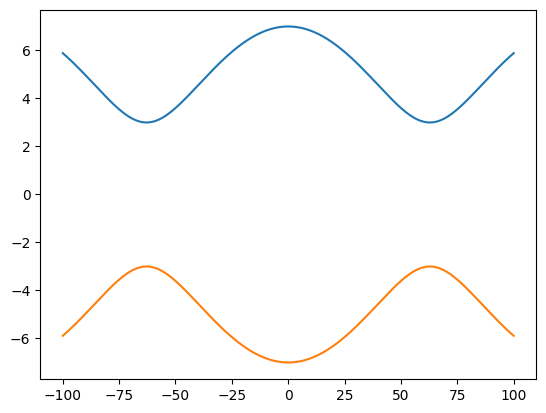

In [ ]:
#Homework 2, solution:
def energy1d_top(k, t1=1., t2=1., a=3.):
  """
  k is momentum in 1/angstrom
  a is typical node separation in angstroms
  t1 and t2 is typical energy scale in solid state
  """
  en1 = np.sqrt(t1**2 + t2**2 + 2*t1*t2*np.cos(k * a))
  en2 = -en1
  return en1, en2

# use test:
en1, en2 = energy1d_top(0.1, t1=10., t2=20., a=10.)

ks = np.linspace(-100, 100, 1000)
en_positive, en_negative = energy1d_top(ks, a=0.05, t1=2, t2=5)

import matplotlib.pyplot as plt
plt.plot(ks, en_positive)
plt.plot(ks, en_negative)


VG internal:

In [ ]:
#for internal VG data pre-processing:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#for internal VG data pre-processing:
import matplotlib.pyplot as plt
location = '/content/drive/MyDrive/Academia/USC/teaching/PHYS190-Practicum-Fall2023/data/chung/'

cols = ['red', 'blue', 'purple', 'magenta']
styles = [':', '--', '-']


d_0 = np.zeros((121, 2))
d_200 = np.zeros((121, 2))
d_3 = np.zeros((121, 2))

inds = [1,2,3]
for i in inds:

  fname1 = f'Buffer_0uM_{i}.txt'
  fname2 = f'Buffer_0uM_BLANK_{i}.txt'

  fname3 = f'DOPS_200uM_{i}.txt'
  fname4 = f'DOPS_200uM_BLANK_{i}.txt'

  fname5 = f'DOPS_3uM_{i}.txt'
  fname6 = f'DOPS_3uM_BLANK_{i}.txt'

  d1 = np.loadtxt(location + fname1)
  d2 = np.loadtxt(location + fname2)
  d3 = np.loadtxt(location + fname3)
  d4 = np.loadtxt(location + fname4)
  d5 = np.loadtxt(location + fname5)
  d6 = np.loadtxt(location + fname6)

  d_0 += (d1 - d2) / 3.
  d_200 += (d3 - d4) / 3.
  d_3 += (d5 - d6) / 3.


d_0[:,0] = d1[:,0]
fname = location + 'data_0uM.txt'
np.savetxt(fname, d_0)

d_200[:,0] = d3[:,0]
fname = location + 'data_200uM.txt'
np.savetxt(fname, d_200)

d_3[:,0] = d5[:,0]
fname = location + 'data_3uM.txt'
np.savetxt(fname, d_3)

fig, ax = plt.subplots()

ax.plot(d_0[:,0], d_0[:,1],  color=cols[0], label='protein only')
ax.plot(d_200[:,0], d_200[:,1],  color=cols[1], label='200 uM of lipids')
ax.plot(d_3[:,0], d_3[:,1],  color=cols[2], label='3 uM of lipids')

ax.set_xlabel('nm', fontsize=25)
ax.set_ylabel('Intensity', fontsize=25)

ax.legend()


FileNotFoundError: ignored